<img src="https://winefolly-wpengine.netdna-ssl.com/wp-content/uploads/2016/02/a-glass-of-wine-a-day-folly.jpg" alt="Annotation Examples" style="width:600px">

<center><h1> Midterm - Wine Quality Data </h1>
<br> Elizabeth Sabiniano </br>
<br> 862188616 </br></center>

### Data Exploration ###

**Background:**

The data depicts the following components of red and white wine:
    1. Fixed acidity
    2. Volatile acidity
    3. Citric acid level
    4. Residual sugar
    5. Chlorides
    6. Free sulfur dioxide
    7. Total sulfur dioxide
    8. Density
    9. pH level
    10. Sulphates
    11. Alcohol content
    
Based on the components above, the wine is given a score between 0 to 10 for its qaulity. The goal of this analysis is to explore some ways in which we can use the sensory details provided from the components of each wine tested and classify the quality of wine.

In order to do this, we need to familiarize with the data structure and relationships between each variable and with the response variable. A good way of exploring this is looking at the correlation of each input features and the response. Another way is to see the distribution of the scores for each input variables along with the distribution of each input features to detect any possible outliers

In [192]:
# load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action = 'once')

In [ ]:
wine_db = pd.read_csv("winequality-red.csv", sep = ';')

Let's look at the data type and summary statistics for our data. Let's also check for any outliers.

In [2]:
wine_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
wine_db.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [138]:
np.round(wine_db.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


We can see that there 1599 entries of wine with differing characteristics along with their quality score. The wine quality scores ranges from 3 to 8.

Using the summary table above, let's look at each variable in the data to see if we have any outstanding outliers that we can possibly remove from the data. We can do this by using a box plot or using the Tukey method, most commonly known for the IQR method, wherein we look at those outside of the bounds within 1.5 of the IQR.

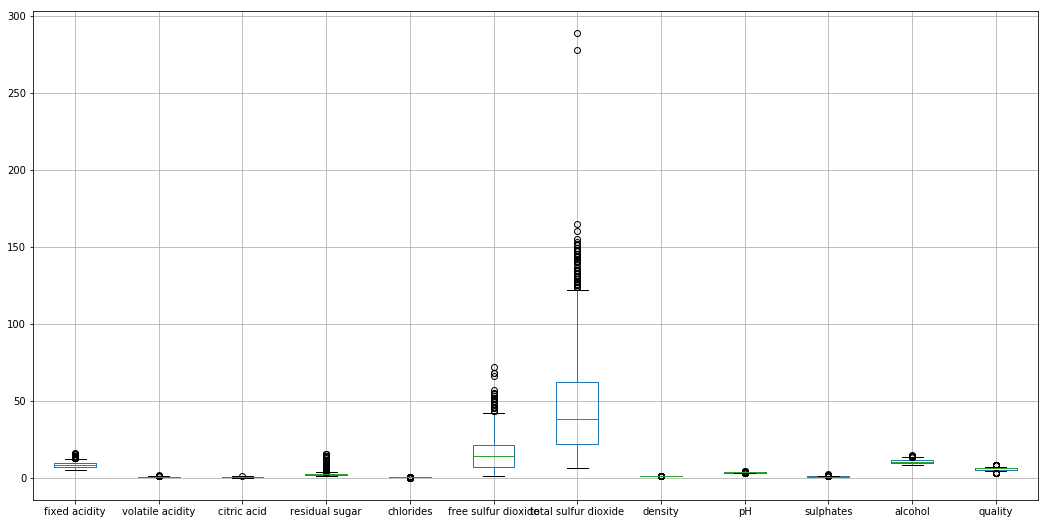

In [5]:
fig = plt.figure(figsize=(18,9))
wine_db.boxplot()

In [137]:
# Tukey rule for outlier detection
def detect_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    lb  = np.round(q1-(1.5*iqr))
    ub = np.round(q3+(1.5*iqr))
    return col_name, lb, ub

# let's apply it for each of the column features of our data
for col in wine_db.columns.values:
    print(detect_outlier(wine_db, col))

('fixed acidity', 4.0, 12.0)
('volatile acidity', 0.0, 1.0)
('citric acid', -0.0, 1.0)
('residual sugar', 1.0, 4.0)
('chlorides', 0.0, 0.0)
('free sulfur dioxide', -14.0, 42.0)
('total sulfur dioxide', -38.0, 122.0)
('density', 1.0, 1.0)
('pH', 3.0, 4.0)
('sulphates', 0.0, 1.0)
('alcohol', 7.0, 14.0)
('quality', 4.0, 8.0)


We can see that there are some outliers from each of the input feature in the dataset; namely the free and total sulfur dioxide.

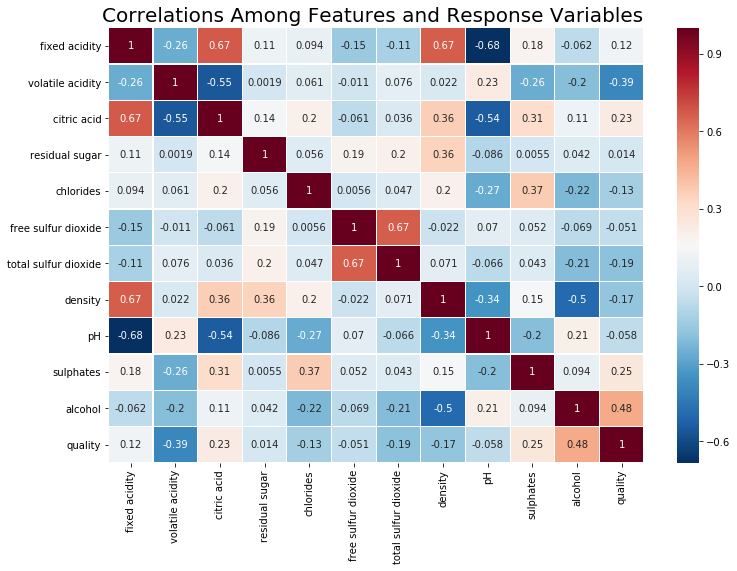

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (12,8))
sns.heatmap(wine_db.corr(), 
            annot=True,  
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1)
plt.title("Correlations Among Features and Response Variables ", y = 1.03,fontsize = 20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B60F20B940>,
      dtype=object)

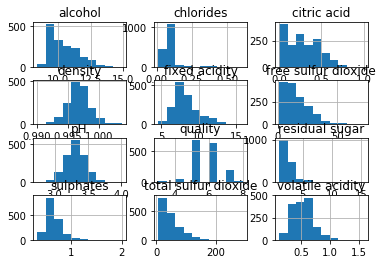

In [8]:
wine_db.hist()

Based on the histograms of the input variables, the data can be scaled in order to optimize our results.

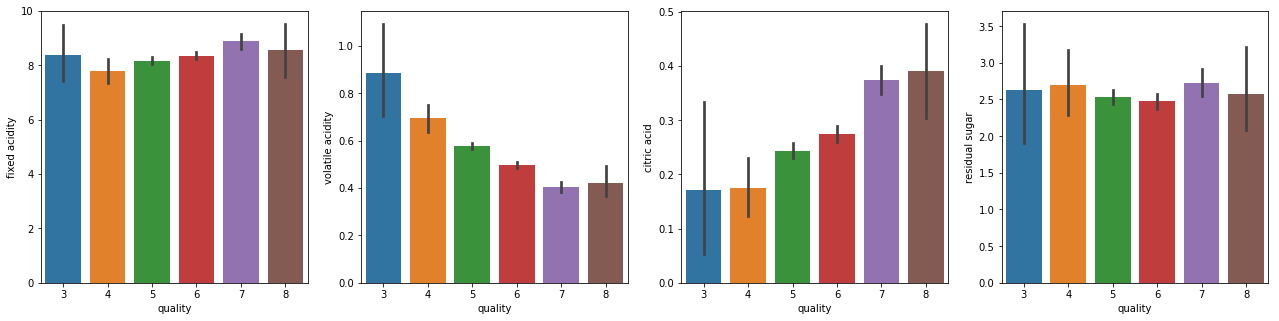

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (22,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_db, orient = 'v', ax=axes[0])
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_db, orient = 'v', ax=axes[1])
sns.barplot(x = 'quality', y = 'citric acid', data = wine_db, orient = 'v', ax=axes[2])
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_db, orient = 'v', ax=axes[3])

We can see that as the quality increases the volatile acidity decreases whereas the citric acid increases along with the quality. According to the [Wine Maker](https://winemakermag.com/article/676-the-perils-of-volatile-acidity), volatile acidity is the process of when wine turns to vinegar; thus it makes sense that it goes down with increasing quality of wine. [Citric acid](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid) on the other hand tends to complement flavors of wine and thus it makes sense to have higher concentration of it in higher quality wines.

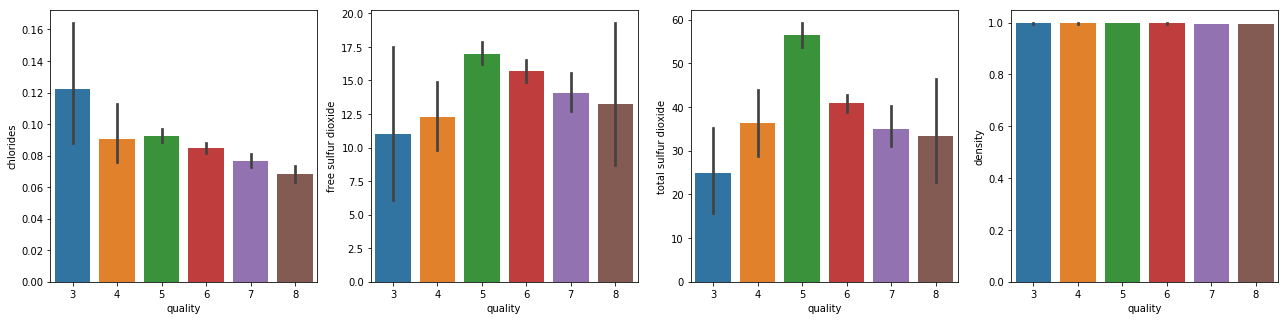

In [10]:
fig, axes = plt.subplots(1, 4, figsize = (22,5))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_db, orient = 'v', ax=axes[0])
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_db, orient = 'v', ax=axes[1])
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_db, orient = 'v', ax=axes[2])
sns.barplot(x = 'quality', y = 'density', data = wine_db, orient = 'v', ax=axes[3])

Similarly, the level of [chlorides](https://www.aromadictionary.com/articles/salt_article.html),which contributes to the saltiness of wine, goes down as the quality rises since a salty wine is not good.

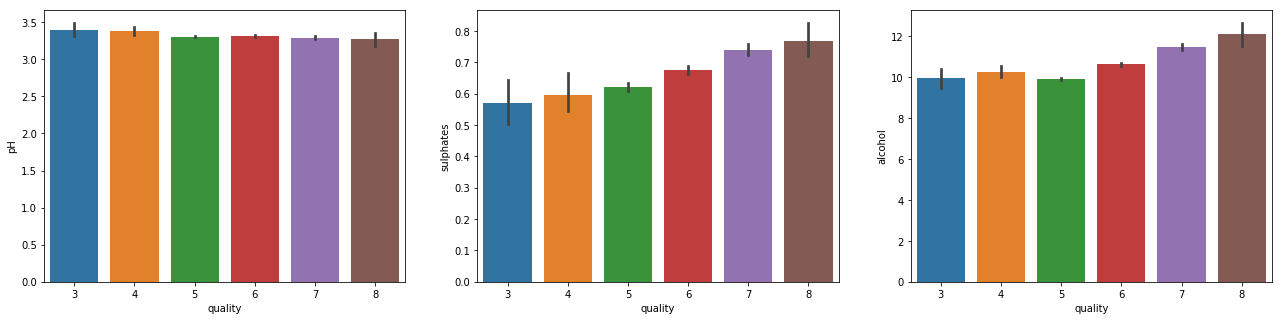

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (22,5))
sns.barplot(x = 'quality', y = 'pH', data = wine_db, orient = 'v', ax=axes[0])
sns.barplot(x = 'quality', y = 'sulphates', data = wine_db, orient = 'v', ax=axes[1])
sns.barplot(x = 'quality', y = 'alcohol', data = wine_db, orient = 'v', ax=axes[2])

The sulphates and alcohol level also increases with the quality of the wine.

### Data cleanup ###

From the steps above, we can see that there are some outliers in the data. We should try and see the sample size reduction if these outliers were taken out. Additionally, all of our data is in a numerical format and it will be good practice to standardize and scale all of our input features in order to help normalise our data.

Additionally, the wine quality scores are all categorical and we can apply either a $k$NN classifier or a logistic regression by converting the scores in a 0/1 scale wherein 1 is good wine and 0 is bad wine.

In [12]:
# Let's remove the outliers from each input features using Tukey method and see the histograms of each variables after
# we also need to look at our sample size after this has taken place

# redefine the function to detect outlierss to remove the outliers for each variables
# Tukey rule for outlier detection
def detect_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    lb  = q1-(1.5*iqr)
    ub = q3+(1.5*iqr)
    new_db =  df_in.loc[(df_in[col_name] > lb) & (df_in[col_name] < ub)]
    return new_db

# let's apply it for each of the column features of our data
new_db = wine_db
for col in new_db.columns.values[0:10]:
    new_db=detect_outlier(new_db, col)


In [13]:
new_db.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,8.147368,0.521693,0.246605,2.181228,0.078226,14.779825,40.882456,0.996559,3.325316,0.629061,10.367266,5.641228
std,1.441996,0.164521,0.180434,0.438829,0.013762,8.573073,24.594164,0.001564,0.129900,0.112597,0.974436,0.760217
min,5.100000,0.120000,0.000000,1.200000,0.042000,1.000000,6.000000,0.992520,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,54.000000,0.997485,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,14.000000,8.000000


In [14]:
(1140/1599)-1 # removing the outliers from each input features may not be a good solution since it took about 29% of the data

-0.2870544090056285

Removing the outlier from each infute features reduces the overall sample by about 29%. This reduction amount may be too extreme considering that we actually don't have a big set of data. We can look into each variable distribution in the histograms and pinpoint the percentile at which we can take out the outliers. For this analysis I will focus on the outcomes of the classification method on this database instead, and test whether it yielded better precision metrics in classifying.

From this point on <code>new_db</code> will be regarded as ***Dataset 2*** and our original <code>wine_db</code> dataset will be ***Dataset 1***.

In [150]:
wine_db_copy = wine_db

"Good" quality wine will be those with quality scores with at least a 6.5 and anything lower will be considered "bad" quality wine.

In [158]:
 # checking to see number of bad and good wine
print("Bad wine count:", wine_db_copy[(wine_db_copy["quality"]>=3) & (wine_db_copy["quality"]<6.5)].count()['quality'])
print("Good wine count:", wine_db_copy[(wine_db_copy["quality"]>=6.5)].count()['quality'])

Bad wine count: 1382
Good wine count: 217


In [159]:
# Making binary classificaion for the response variable
# Dividing wine as good and bad -- 6.5 and above is good and all below is bad
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_db_copy['quality'] = pd.cut(wine_db_copy['quality'], bins = bins, labels = group_names)

In [160]:
# turn the labels into 1 or 0 values using labelencoder
LE= LabelEncoder()

In [162]:
wine_db_copy['quality'] = LE.fit_transform(wine_db_copy['quality'])

In [163]:
wine_db_copy['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [209]:
1382/1599

0.8642901813633521

Let's also change the label for ***Dataset 2*** to get it ready for classification.

In [54]:
new_db_copy = new_db
new_db_copy['quality'] = pd.cut(new_db_copy['quality'], bins = bins, labels = group_names)
new_db_copy['quality'] = LE.fit_transform(new_db_copy['quality'])
new_db_copy['quality'].value_counts()

0    998
1    142
Name: quality, dtype: int64

### Splitting between Training and Testing ###

Splitting for our ***Dataset 1***

In [241]:
#Now seperate the dataset as response variable and feature variabes
X = wine_db_copy.drop('quality', axis = 1)
y = wine_db_copy['quality']

In [242]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [243]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # scaling hte variables
X1_train = sc.fit_transform(X1_train)
X1_test = sc.fit_transform(X1_test)

Splitting for our ***Dataset 2***

In [89]:
X_copy = new_db_copy.drop('quality', axis = 1)
y_copy = new_db_copy['quality']

In [98]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=123, stratify=y_copy)

### Classifying the Data ###

**KNN Classifier** for ***Dataset 1*** (including possible outliers):

In [107]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [108]:
KNN.score(X1_test, y1_test) 

0.884375

In [110]:
pred_knn = KNN.predict(X1_test)
print(classification_report(y1_test, pred_knn))
print(confusion_matrix(y1_test, pred_knn))
print(accuracy_score(y1_test, pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       277
           1       0.59      0.47      0.52        43

   micro avg       0.88      0.88      0.88       320
   macro avg       0.75      0.71      0.73       320
weighted avg       0.88      0.88      0.88       320

[[263  14]
 [ 23  20]]
0.884375


The accuracy for ***Dataset 1*** is 88%, which is pretty good. Another good metric to consider is the distance between the sensitivity and specificity rate. Ideally, a good model will have high specificity and sensitivity so the goal is to have the two values as high and as close to each other as possible. In this case, there is about 48% difference between the two.

The previous metric is also related to the F1 score which is a rather better metric in our case due to the uneven class distribution. We can see that the F1 score for this model is at least 73% for the macro average and 88% for both the micro average and the weighted average.

In [173]:
.95-.47

0.48

In [171]:
1-(14/(263+14))

0.9494584837545126

In [172]:
1-(23/(23+20))

0.4651162790697675

**KNN Classifier** for ***Dataset 2*** (excluding possible outliers):

In [102]:
KNN2 = KNeighborsClassifier(n_neighbors=3)
KNN2.fit(X2_train, y2_train)
print(KNN2.score(X2_test, y2_test))
pred_knn2 = KNN2.predict(X2_test)
print(classification_report(y2_test, pred_knn2))
print(confusion_matrix(y2_test, pred_knn2))
print(accuracy_score(y2_test, pred_knn2))

0.8903508771929824
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       200
           1       0.59      0.36      0.44        28

   micro avg       0.89      0.89      0.89       228
   macro avg       0.75      0.66      0.69       228
weighted avg       0.87      0.89      0.88       228

[[193   7]
 [ 18  10]]
0.8903508771929824


The accuracy rate for ***Dataset 2*** using the KNN classifier is 89%, which is higher by about 1%. Additionally, the difference between its sensitivity rate and specificity rate is about 60%, which is a lot higher than the difference of the specificity and sensitivity rate of ***Dataset 1***.

The F1 score of this model is at 69% for the macro average, which is lower than the macro average of our first model for ***Dataset 1***.

In [174]:
.96-.36

0.6

**Logistic Regression** for ***Dataset 1*** (including possible outliers):

In [223]:
lr1 = LogisticRegression()
lr1.fit(X1_train, y1_train)
lr1_predict = lr1.predict(X1_test)

In [224]:
#print confusion matrix and accuracy score
print(lr1.score(X1_test, y1_test))
print(classification_report(y1_test, lr1_predict))
print(confusion_matrix(y1_test, lr1_predict))
print(accuracy_score(y1_test, lr1_predict))

0.884375
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       277
           1       0.62      0.37      0.46        43

   micro avg       0.88      0.88      0.88       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320

[[267  10]
 [ 27  16]]
0.884375


In [176]:
.96-.37

0.59

The accuracy rate for the Logistic Model for ***Dataset 1*** is also at 88%. The difference between their specificity and sensitivity rate is at 59% whereas the macro average of its F1 score is at 70%. Overall, it's not far from the very first model we created using the KNN classifier for ***Dataset 1***

**Logistic Regression** for ***Dataset 2*** (excluding possible outliers):

In [115]:
lr2 = LogisticRegression()
lr2.fit(X2_train, y2_train)
lr2_predict = lr2.predict(X2_test)

print(lr2.score(X2_test, y2_test))
print(classification_report(y2_test, lr2_predict))
print(confusion_matrix(y2_test, lr2_predict))
print(accuracy_score(y2_test, lr2_predict))

0.9035087719298246
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       200
           1       0.88      0.25      0.39        28

   micro avg       0.90      0.90      0.90       228
   macro avg       0.89      0.62      0.67       228
weighted avg       0.90      0.90      0.88       228

[[199   1]
 [ 21   7]]
0.9035087719298246


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [177]:
.99-.25

0.74

So far, the logistic regression model for ***Dataset 2*** has the highest accuracy at 90%. However, the difference between its specificity and sensitivity rate is the lowest at 74%. It also has the lowest f1 score across all the models.

### Validating the Data ###

In order to validate that our model metric results are not due to our choosing of parameters, we will test the model using a 10-fold cross validation to arrive the (1) mean of our model metrics (accuracy and F1 scores) and (2) the best parameters that will yield the best metrics for our model. In this case, I will test both the F1 macro average scoring along with the accuracy score to see what is the best fitted parameters for our model.

**KNN Classifier $k$-fold validation for *Dataset 1***

In [200]:
# KNN validatoin using 3 nearest neighbors
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 - accuracy
cv_scores_ave = cross_val_score(knn_cv, X, y, cv=10)

# train model with cv of 5 - f1 score
cv_scores_f1 = cross_val_score(knn_cv, X, y, cv=10, scoring='f1_macro')

#print each cv score (accuracy) and average them
print('Mean accuracy scores', np.round(cv_scores_ave,2))
print('cv_scores_ave mean:{}'.format(np.round(np.mean(cv_scores_ave),2)))

#print each cv score (f1 macro) and average them
print('Mean f1 scores', np.round(cv_scores_ave,2))
print('cv_scores_f1 mean:{}'.format(np.round(np.mean(cv_scores_f1),2)))

Mean accuracy scores [0.88 0.86 0.82 0.82 0.89 0.86 0.79 0.82 0.87 0.86]
cv_scores_ave mean:0.85
Mean f1 scores [0.88 0.86 0.82 0.82 0.89 0.86 0.79 0.82 0.87 0.86]
cv_scores_f1 mean:0.62


In [202]:
#create new a knn model testing 1 to 25 nearest neighbors based on accuracy. 
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)

#fit model to data
knn_gscv.fit(X, y)

# best parameter based on accuracy
print('Based parameter based on accuracy:', knn_gscv.best_params_)

#accuracy score
print('Accuracy score:', knn_gscv.best_score_)

Based parameter based on accuracy: {'n_neighbors': 16}
Accuracy score: 0.8649155722326454


In [196]:
#create new a knn model testing 1 to 25 nearest neighbors based on f1 score
warnings.filterwarnings('ignore')
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10, scoring = 'f1_macro')

#fit model to data
knn_gscv.fit(X, y)

# best parameter based on accuracy
print('Based parameter based on f1 score:', knn_gscv.best_params_)

#accuracy score
print('f1 score:', knn_gscv.best_score_)

Based parameter based on f1 score: {'n_neighbors': 3}
f1 score: 0.6041530936948323


$k$-fold validation let's us tune our parameters and select the best parameter that will yield a better result based on a metric of our choosing. 

Using the 10 fold validation with the first parameter we chose, 3 nearest neighbors, we can see that the average accuracy is 85% while the F1 score is 62%. These results show that 3 nearest neighbors is a good parameter and yield pretty good classification results.

We can further see that for the KNN classifier for ***Dataset 1***, the best parameter using a 10-fold validation is 16 with 86% accuracy. On the other hand, if we use the F1 scoring metric, the best parameter chosen is 3 with an F1 score of 60%. 

I do think that 16 is a little bit extreme for the number of neighbors to choose for the KNN classifier especially due to the higher proportion of "bad" wine in our data. This is because in ***Dataset 1***, there are 1382 "bad" wines which is about 86% of our data; if we guess the quality to always be bad, we are likely to be right. Thus, I think a good balance between 3 and 16 will be a good fit for our data as it has already an over .5 F1 score with 3 nearest neighbors. Using 16 nearest neighbors may raise our accuracy but due to the class imbalance in our data, I'd take this number with a grain of salt and go with a more modest number.

**KNN Classifier $k$-fold validation for *Dataset 2***

In [208]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores_ave = cross_val_score(knn_cv, X_copy, y_copy, cv=10)

# train model with cv of 5 - f1 score
cv_scores_f1 = cross_val_score(knn_cv, X_copy, y_copy, cv=10, scoring='f1_macro')

#print each cv score (accuracy) and average them
print('Mean accuracy scores', np.round(cv_scores_ave,2))
print('cv_scores_ave mean:{}'.format(np.round(np.mean(cv_scores_ave),2)))

#print each cv score (f1 macro) and average them
print('Mean f1 scores', np.round(cv_scores_ave,2))
print('cv_scores_f1 mean:{}'.format(np.round(np.mean(cv_scores_f1),2)))

Mean accuracy scores [0.87 0.88 0.82 0.86 0.89 0.83 0.83 0.84 0.88 0.87]
cv_scores_ave mean:0.86
Mean f1 scores [0.87 0.88 0.82 0.86 0.89 0.83 0.83 0.84 0.88 0.87]
cv_scores_f1 mean:0.6


In [204]:
#create new a knn model testing 1 to 25 nearest neighbors based on accuracy. 
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)

#fit model to data
knn_gscv.fit(X_copy, y_copy)

# best parameter based on accuracy
print('Based parameter based on accuracy:', knn_gscv.best_params_)

#accuracy score
print('Accuracy score:', knn_gscv.best_score_)

Based parameter based on accuracy: {'n_neighbors': 15}
Accuracy score: 0.8842105263157894


In [207]:
#create new a knn model testing 1 to 25 nearest neighbors based on f1 score
warnings.filterwarnings('ignore')
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10, scoring = 'f1_macro')

#fit model to data
knn_gscv.fit(X_copy, y_copy)

# best parameter based on accuracy
print('Based parameter based on f1 score:', knn_gscv.best_params_)

#accuracy score
print('f1 score:', knn_gscv.best_score_)

Based parameter based on f1 score: {'n_neighbors': 1}
f1 score: 0.6450641093982643


Using the 10 fold validation with the first parameter we chose, 3 nearest neighbors, we can see that the average accuracy is 86% while the F1 score is 60%. These results show that 3 nearest neighbors is still a good parameter and yield pretty good classification results even for our dataset with all possible outliers taken out (***Dataset 2***).

We can further see that for the KNN classifier for Dataset 1, the best parameter using a 10-fold validation is 15 with 88% accuracy. On the other hand, if we use the F1 scoring metric, the best parameter chosen is 1 with an F1 score of 65%.

Using a 1 nearest neighbor for a classification may not be the best practice when it comes to classification as it may cause overfitting.

**Logistic Regression $k$-fold validation for *Dataset 1***

In [220]:
warnings.filterwarnings('ignore')

lr = LogisticRegression()
print('Mean accuracy score:', np.round(cross_val_score(lr, X, y, cv=10).mean(),2))
print('Mean f1 score:', np.round(cross_val_score(lr, X, y, cv = 10, scoring='f1_macro').mean(),2))

Mean accuracy score: 0.87
Mean f1 score: 0.66


In [215]:
# cross validation to find the best logistic regression parameters based on accuracy

warnings.filterwarnings('ignore')
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso (square magnitude) l2 ridge (absolute value)
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters based on accuracy) ",logreg_cv.best_params_)
print("Accuracy score:", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters based on accuracy)  {'C': 10.0, 'penalty': 'l2'}
Accuracy score: 0.8755472170106317


In [216]:
# cross validation to find the best logistic regression parameters based on f1 score
warnings.filterwarnings('ignore')

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso (square magnitude) l2 ridge (absolute value)
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = 'f1_macro')
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters based on f1 score) ",logreg_cv.best_params_)
print("f1 score:",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters based on f1 score)  {'C': 10.0, 'penalty': 'l2'}
f1 score: 0.6675611647940548


Using the full dataset, ***Dataset 1***, we can see that the accuracy is at 87% and the F1 score is at 64% with a 10-fold cross validation. These respective values are higher than the 10-fold validation results using the KNN classifier wiht $k =3$.

We can also see that when cross validating the logistic model, the validation using accuracy and F1 scores are the same for the C and the ridge regularization penalty. Both of the respective results are also higher than the KNN results at 88% and 67%, respectively.

**Logistic Regression $k$-fold validation for *Dataset 2***

In [225]:
warnings.filterwarnings('ignore')

lr = LogisticRegression()
print('Mean accuracy score:', np.round(cross_val_score(lr, X_copy, y_copy, cv=10).mean(),2))
print('Mean f1 score:', np.round(cross_val_score(lr, X_copy, y_copy, cv = 10, scoring='f1_macro').mean(),2))

Mean accuracy score: 0.89
Mean f1 score: 0.66


In [229]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_copy,y_copy)

print("tuned hpyerparameters :(best parameters based on accuracy) ",logreg_cv.best_params_)
print("Accuracy score:", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters based on accuracy)  {'C': 100.0, 'penalty': 'l1'}
Accuracy score: 0.8947368421052632


In [228]:
# cross validation to find the best logistic regression parameters based on f1 score
warnings.filterwarnings('ignore')

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso (square magnitude) l2 ridge (absolute value)
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = 'f1_macro')
logreg_cv.fit(X_copy,y_copy)

print("tuned hpyerparameters :(best parameters based on f1 score) ",logreg_cv.best_params_)
print("f1 score:",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters based on f1 score)  {'C': 1000.0, 'penalty': 'l2'}
f1 score: 0.6894430827995728


The accuracy and F1 score using logistic regression on ***Dataset 2*** is 89% and 66%, respectively. These are also higher than the cross validated results for ***Dataset 2*** using KNN classifier.

It's interesting to note that the cross validated paramerter selection using accuracy and F1 scores are different in this case. Using accuracy scores, $C=100$ and the lasso regression is the chosen penalty whereas $C=1000$ and ridge regression is chosen using the F1 score.

Again, due to the imbalance of the classes, it makes more sense to me to rely more on the F1 scores. Additionally, the validation of the previous logistic regression models on ***Dataset 1*** also suggest the use of ridge regression. Thus, I do think for our model ridge penalty is sufficient.

If we look back at the correlation matrix in the exploration part of the analysis, we can see some highly correlated input variables that may warrant the use of a lasso regularization or principal component analyis for feature selection. Below, I've selected to use the logistic regression after applying PCA in order to see if this will improve our accuracy and F1 scores.

In [253]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Make an instance of the Model
pca = PCA(.95)

sc = StandardScaler() # scaling hte variables
X1_train = sc.fit_transform(X1_train)
X1_test = sc.fit_transform(X1_test)

pca.fit(X1_train)
X1_train = pca.transform(X1_train)
X1_test = pca.transform(X1_test)

lr1 = LogisticRegression()
lr1.fit(X1_train, y1_train)
lr1_predict = lr1.predict(X1_test)

#print confusion matrix and accuracy score
print('Classification Report: \n', classification_report(y1_test, lr1_predict))
print('Confusion Matrix:', '\n', confusion_matrix(y1_test, lr1_predict))
print('Accuracy:', accuracy_score(y1_test, lr1_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       277
           1       0.59      0.37      0.46        43

   micro avg       0.88      0.88      0.88       320
   macro avg       0.75      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320

Confusion Matrix: 
 [[266  11]
 [ 27  16]]
Accuracy: 0.88125


We can see that the PCA yields 88% accuracy, similar to our previous logistic regression models with a 70% F1 score, which is higher than the cross validated F1 score results we've previously obtained.

I think this warrants that PCA is a useful transformation to our data considering the high correlations amongst some variables. The dimension reduction definitely benefited our results, especially the F1 score.

### Conclusion ###

Overall, I think the best model for this analysis between KNN Classifier and Logistic Regression, is the Logistic Regression. Based on some [research](https://scholar.google.com/scholar?q=knn%20unbalanced%20data&hl=en&as_sdt=0&as_vis=1&oi=scholart), I've learned that KNN Classifier is very susceptible to imbalanced data distribution.

Additionally, based on the results, taking out all the outliers for each respective input features does not seem to show significance. ***Dataset 2*** consistently had higher accuracies for all the models listed compared to ***Dataset 1*** but their respective F1 scores are always lower. 

Logistic regression seems work best when it comes to binary classification considering our results consistently showed higher accuracy and F1 score for all the logistic models. In addition, the application of PCA is beneficial to our model than the lasso regularization.